In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tensorflow.keras.utils import load_img

2023-01-15 22:43:07.901311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aaryan/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-15 22:43:07.901397: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [61]:
df = pd.read_csv('labels.csv')

In [62]:
df.head()

,image_name,points
0,medicakolkata_mau_mon--2_2022_6_8_6_8_51.jpeg,"[459.5, 169.5, 886.0999755859375, 172.19999694..."
1,kamalnayanbajaj_micu_mon--22_2022_6_20_17_47_2...,"[422.4, 158, 967.8, 135.5, 957.3, 545.2, 409.5..."
2,kamalnayanbajaj_micu_mon--15_2022_6_20_22_46_2...,"[497.4, 184.9, 792.7999877929688, 229.19999694..."
3,medicakolkata_ccu2_mon--3_2022_5_30_12_6_19.jpeg,"[353.79998779296875, 112.69999694824219, 764.2..."
4,medicakolkata_ccu2_mon--5_2022_6_8_6_6_37.jpeg,"[246.9, 155.3, 756.5999755859375, 205.89999389..."


In [63]:
for pts in range(df['points'].shape[0]):
    temp = df['points'][pts].split(',')
    for i in range(8):
        if i == 0:
            temp[i] = temp[i].replace('[','',1)
        elif i == 7:
            temp[i] = temp[i].replace(']','',1)
        temp[i] = float(temp[i])
    df['points'][pts] = temp
#     print(type(pts))
#     print(type(df['points'][pts]))

In [64]:
df.head()

,image_name,points
0,medicakolkata_mau_mon--2_2022_6_8_6_8_51.jpeg,"[459.5, 169.5, 886.0999755859375, 172.19999694..."
1,kamalnayanbajaj_micu_mon--22_2022_6_20_17_47_2...,"[422.4, 158.0, 967.8, 135.5, 957.3, 545.2, 409..."
2,kamalnayanbajaj_micu_mon--15_2022_6_20_22_46_2...,"[497.4, 184.9, 792.7999877929688, 229.19999694..."
3,medicakolkata_ccu2_mon--3_2022_5_30_12_6_19.jpeg,"[353.79998779296875, 112.69999694824219, 764.2..."
4,medicakolkata_ccu2_mon--5_2022_6_8_6_6_37.jpeg,"[246.9, 155.3, 756.5999755859375, 205.89999389..."


In [77]:
#Labels contains 2 columns. First column 'image_name' maps to name of image file. Second column contains list of 8 points.
# The points are co-ordinates for creating a quadrilateral. 
# Image size is 1280 X 720 pixels.
# Each label contains points in [x1, y1, x2, y2, x3, y3, x4, y4] order.
# Here x1 is pixel distance from left edge of the image and y1 is pixel distance from top edge of image.
img_name = df['image_name'][0]
# img = load_img(f'img/{img_name}',target_size = (180,320))
img = cv2.imread(f'img/{img_name}')
img = cv2.resize(img, (320,180))

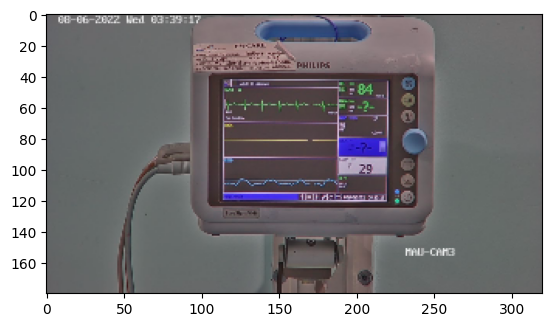

In [78]:
plt.imshow(img)

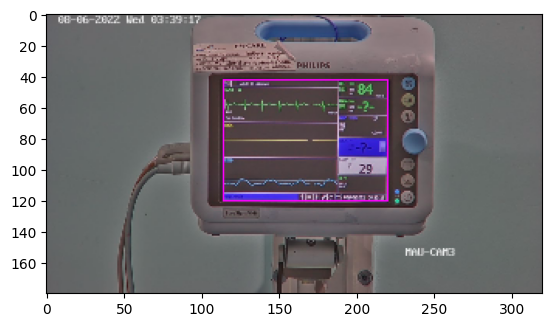

In [79]:
# rectangle(img,bbox,(255,0,255),rt)
corners = df['points'][0]
img = cv2.rectangle(img,(int(corners[0])//4,int(corners[1])//4),(int(corners[4])//4,int(corners[5])//4),(255,0,255),1)
plt.imshow(img)

In [72]:
cv2.rectangle?

In [68]:
# Removing 1st occurrence of s, i.e 5th pos.
# if we wish to remove it.
# new_str = test_str.replace('s', '', 1)
# for i in range(8):
#     if i == 0:
#         temp[i] = temp[i].replace('[','',1)
#     elif i == 7:
#         temp[i] = temp[i].replace(']','',1)
#     temp[i] = float(temp[i])
# print(temp)
print(corners)

[459.5, 169.5, 886.0999755859375, 172.1999969482422, 880.9000244140625, 483.0, 460.0, 481.70001220703125]


In [70]:
corners[0]

459.5

In [41]:
li = [459.5, 169.5, 886.0999755859375, 172.1999969482422, 880.9000244140625, 483, 460, 481.70001220703125]
a = ""
a = li
print(a)

[459.5, 169.5, 886.0999755859375, 172.1999969482422, 880.9000244140625, 483, 460, 481.70001220703125]


In [48]:
type(df['points'][0])

str

In [53]:
df['points'].shape[0]

2000